- [ ] A vs B plot
    - Use log evidence on seeing (un-)observed counts instead of probability
        - That is log evidence for unseen dataset (calculate for all at once using formula 8)
￼
            - Where s_hat is the see_data and k_ba are the counts in that data
    - Point: Small plot to show that our model is stable

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import math

sys.path.append("../")

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [3]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

Use MCM paritioning from fitting but do not use the ML parameters/ found counts but the counts from the new dataset
1. load mcm partitioning
2. write function data to (un-)smoothed counts


In [4]:
# for each icc
# construct the count distribution given some dataset

# first load some example data
# test_data = utils.load_test_data(digit=0)

In [5]:
digit = 0

sample_sizes = [100, 1000, 2000, 3000]
letter = "B"
path_format = "../OUTPUT/sample_sizes_split_{}"

counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter)

n_runs = min([len(i) for i in mcms_samplesizes])




other_letter = "B" if letter == "A" else "A"
print(letter, other_letter)

# see other letter
evids_both = [] # 0 = own; 1 = other

for see_letter in [letter, other_letter]:
    print(see_letter)
    evids = np.zeros((len(sample_sizes), n_runs)) # nr sample sizes, nr runs
    for sample_size_idx, sample_size in enumerate(sample_sizes):

        mcms = mcms_samplesizes[sample_size_idx][:n_runs]
        # my_counts = counts_samplesizes[sample_size_idx][:n_runs] # test
         
        for run_idx, mcm in enumerate(mcms):
            seed_run = run_idx+1
            test_data = utils.recreate_dataset(see_letter,digit, sample_size, seed=seed_run) 
            evids[sample_size_idx][run_idx] = utils.evidence_on_data(mcm[digit], test_data)# / sample_size

            # print(len(my_counts[run_idx]),len(mcms))
            # per_icc = np.sum(utils.evidence_iccs(my_counts[run_idx], mcms[run_idx],digit))#/ my_sample_size
            # if not evids[sample_size_idx][run_idx] == per_icc and see_letter = letter:
            #     raise KeyboardInterrupt
            # print(evids[sample_size_idx][run_idx] == per_icc, evids[sample_size_idx][run_idx], per_icc)  # if res constructed on own letter, should be exact same result)

    evids_both.append(evids)


B A
B
A


In [13]:
letter

'B'

In [14]:
np.save(f"../OUTPUT/general_files/plots_AB_evi-{letter}_both",np.array(evids_both))

In [20]:

evids_both = [np.divide(arr, np.array(sample_sizes)[:, np.newaxis]) for arr in evids_both]

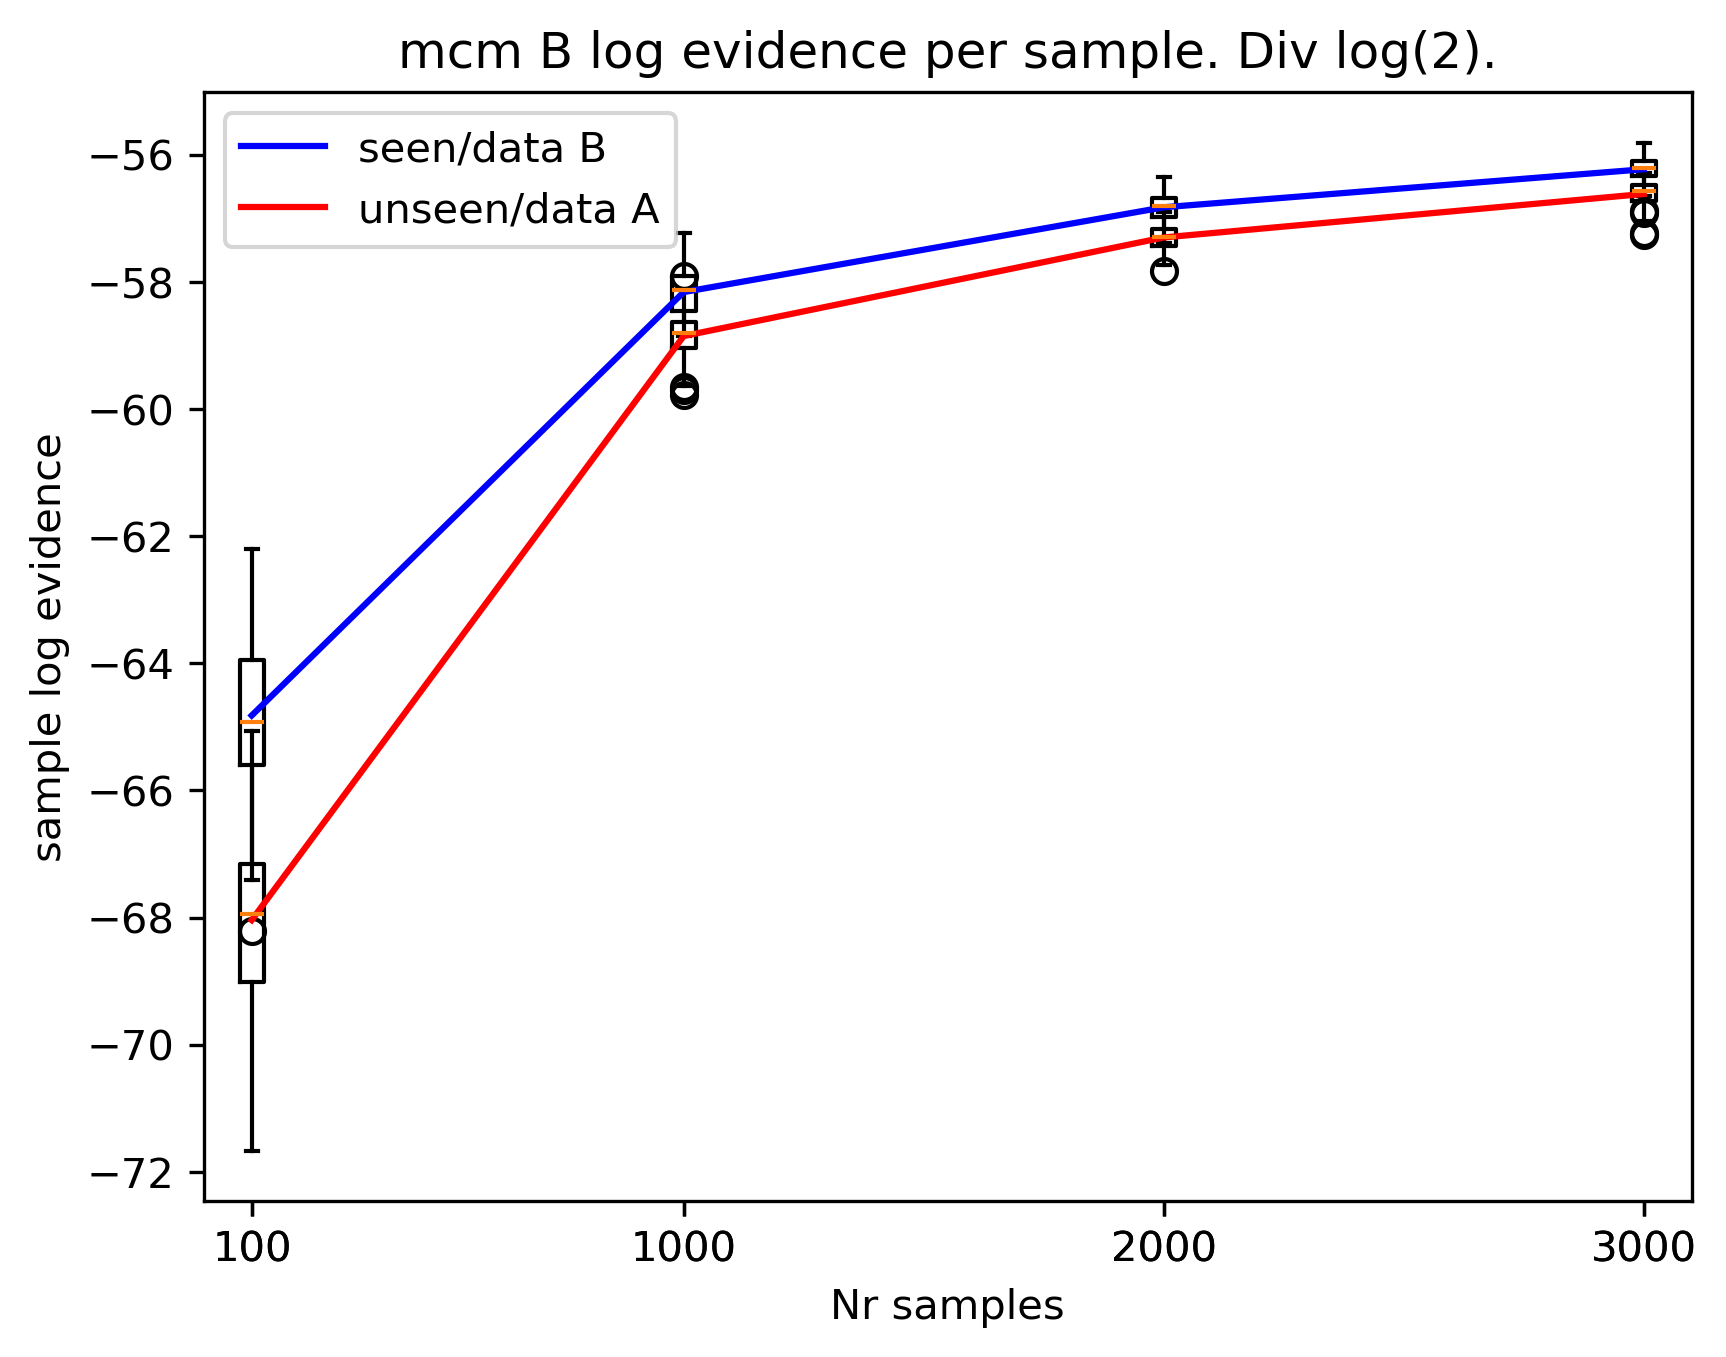

In [16]:
plt.figure()
plt.boxplot(evids_both[0].T/np.log(2), positions=sample_sizes,widths= 50)
plt.boxplot(evids_both[1].T/np.log(2), positions=sample_sizes,widths= 50)

plt.plot(sample_sizes,np.mean(evids_both[0]/np.log(2),axis=1), label=f"seen/data {letter}", color="blue")
plt.plot(sample_sizes,np.mean(evids_both[1]/np.log(2),axis=1),label=f"unseen/data {other_letter}", color="red")

plt.xlim((min(sample_sizes)-100,max(sample_sizes)+100))
plt.ylabel("sample log evidence")
plt.xlabel("Nr samples")
plt.title(f"mcm {letter} log evidence per sample. Div log(2).")
plt.legend()
plt.show()

load data and display side by side

In [21]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [24]:
evids_both_A = np.load(f"../OUTPUT/general_files/plots_AB_evi-A_both.npy")
evids_both_B = np.load(f"../OUTPUT/general_files/plots_AB_evi-B_both.npy")
evids_both_B = [np.divide(arr, np.array(sample_sizes)[:, np.newaxis]) for arr in evids_both_B]

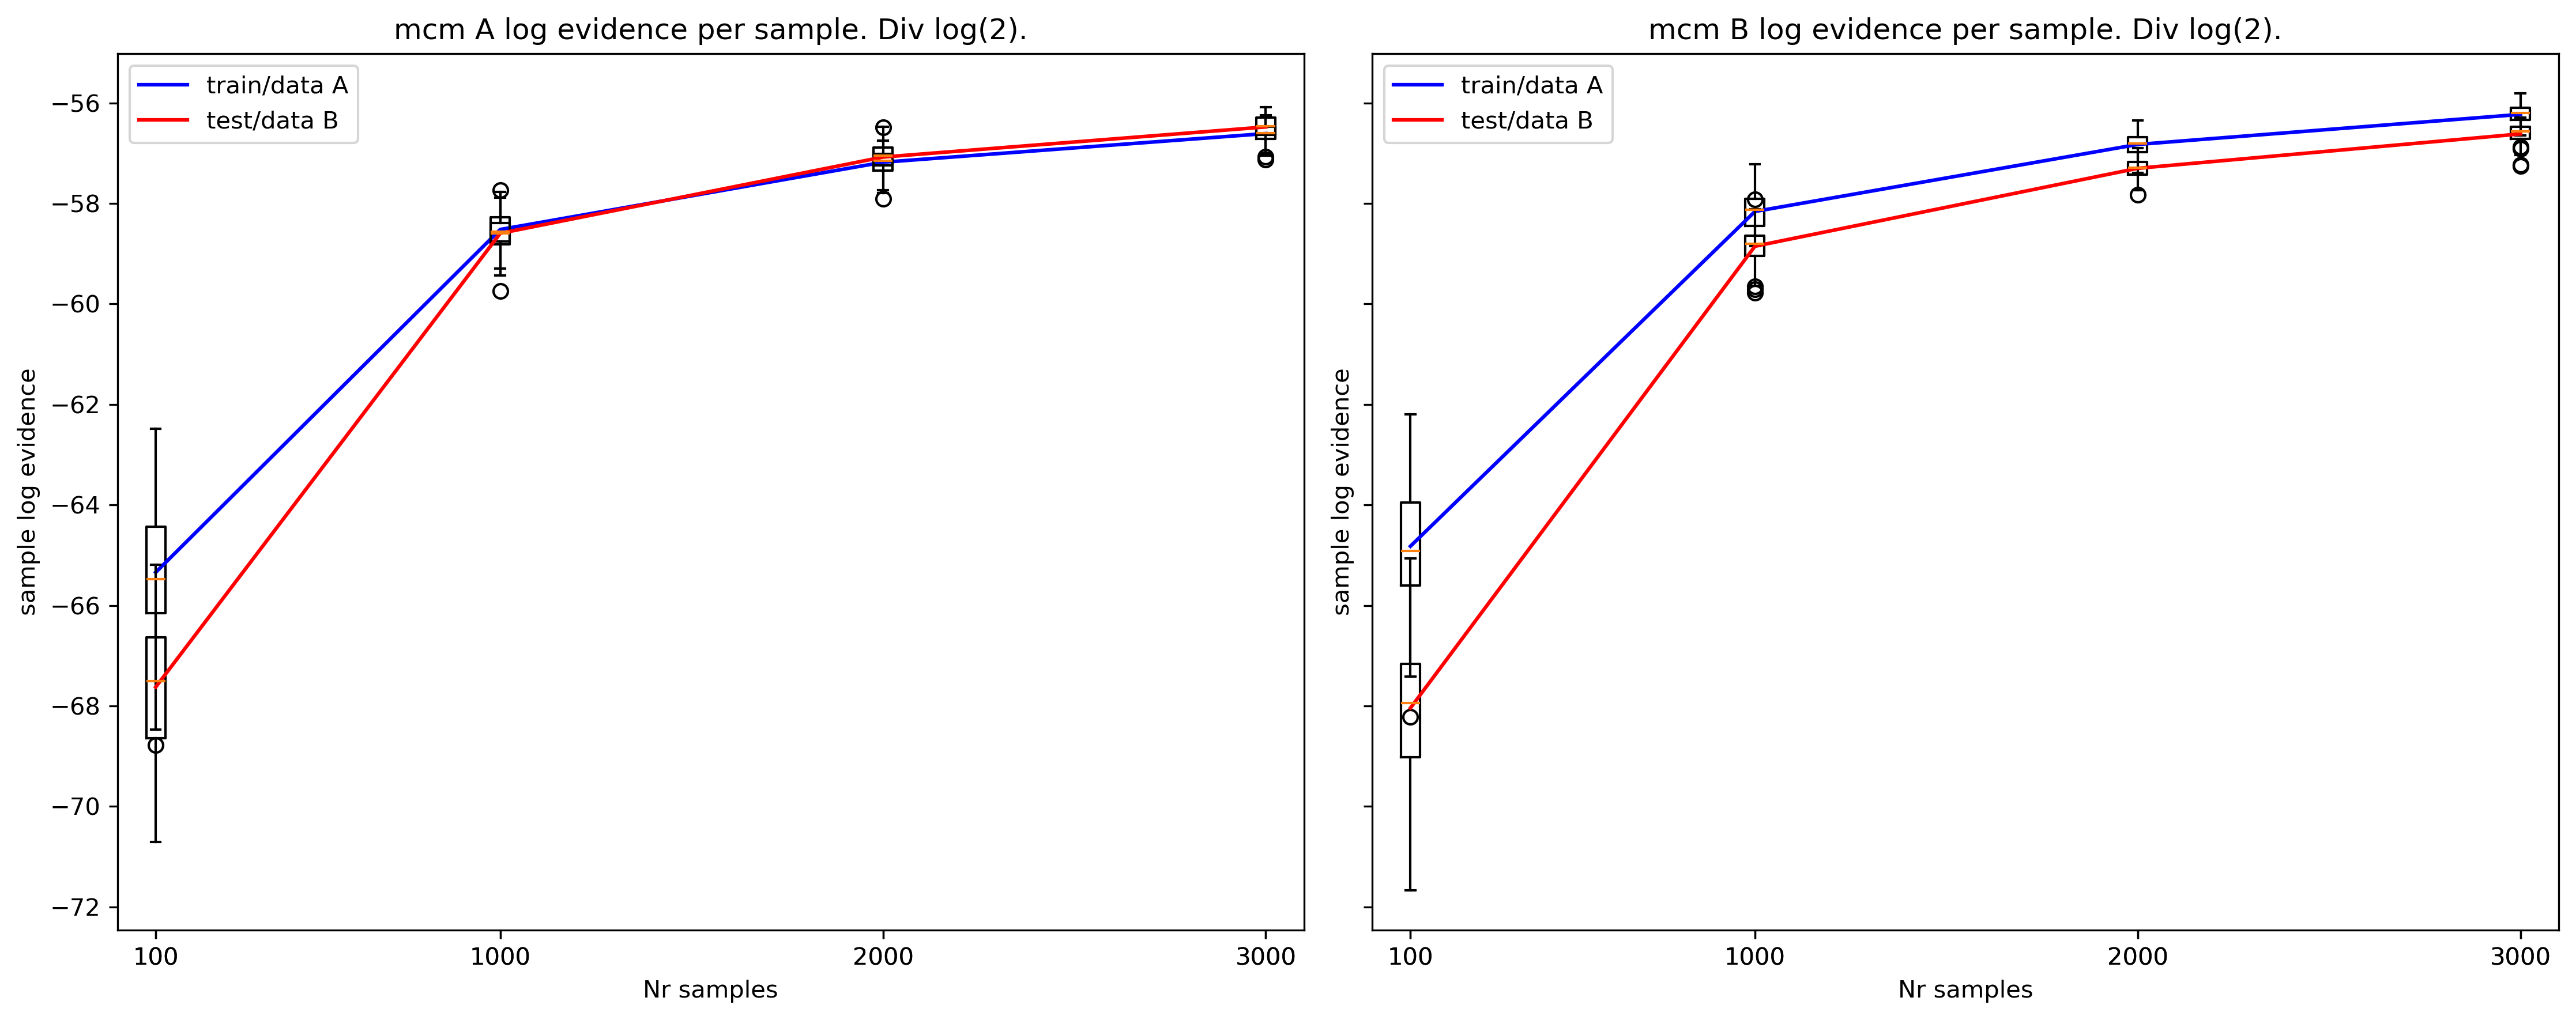

In [41]:
# INVERSE
# side by side MCM A vs MCM B
digit = 0
sample_sizes = [100, 1000, 2000, 3000]

fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
# axs = [axs, axs]
for i, (evids_both, ax) in enumerate(zip([evids_both_A, evids_both_B], axs)):
    # ax = axs[0]
    for j in range(2):
        ax.boxplot(evids_both[j].T/np.log(2), positions=sample_sizes, widths=50)
        ax.plot(sample_sizes, np.mean(evids_both[j]/np.log(2), axis=1), label=f"{'train' if j == 0 else 'test'}/data {chr(ord('A') + j)}", color="blue" if j == 0 else "red")

    ax.set_xlim((min(sample_sizes)-100, max(sample_sizes)+100))
    ax.set_ylabel("sample log evidence")
    ax.set_xlabel("Nr samples")
    ax.set_title(f"mcm {chr(ord('A') + i)} log evidence per sample. Div log(2).")
    ax.legend()

plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


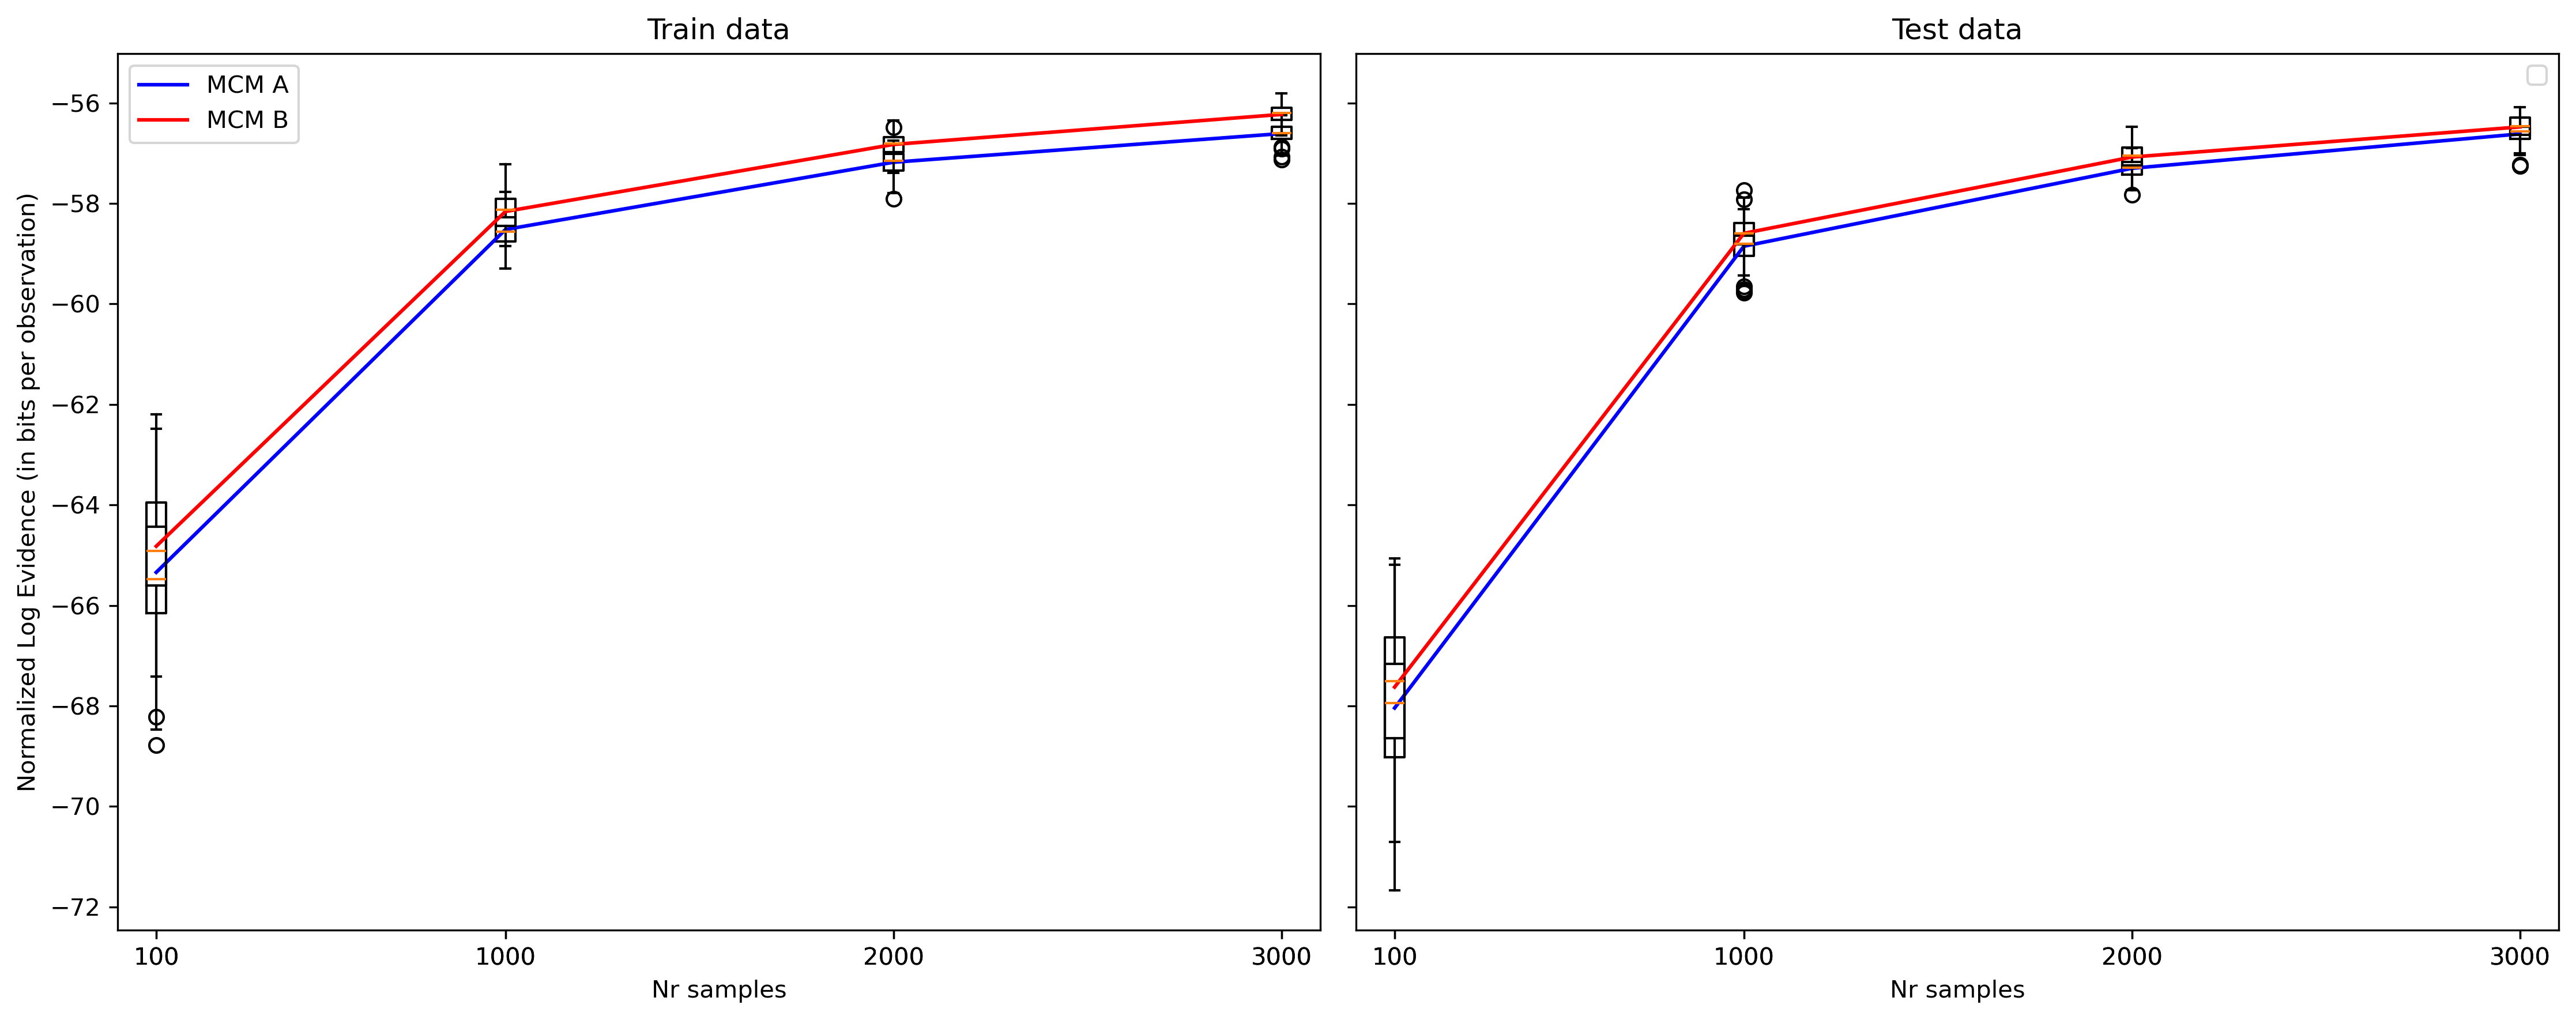

In [53]:
# side by side Data A vs Data B

digit = 0
sample_sizes = [100, 1000, 2000, 3000]

fig, axs = plt.subplots(1, 2, figsize=(15, 6),sharey=True)
# axs = [axs, axs]


for i, ax in enumerate(axs):
    evids_list = [evids_both_A, evids_both_B]
    if i == 1:  # Reverse the order for the second plot
            evids_list = evids_list[::-1]
    for j, evids in enumerate(evids_list):
        # first run will be MCM A MCM B both for train data (so A, B)
        ax.boxplot(evids[i].T/np.log(2), positions=sample_sizes, widths=50)

        ax.plot(sample_sizes, np.mean(evids[i]/np.log(2), axis=1), label=f"MCM {chr(ord('A') + j)}" if not i else None, color="blue" if j == 0 else "red") #f"{'train' if i == 0 else 'test'}/data {chr(ord('A') + j)}"


    if i == 0:
        ax.set_ylabel("Normalized Log Evidence (in bits per observation)")

    ax.set_xlim((min(sample_sizes)-100, max(sample_sizes)+100))
    ax.set_xlabel("Nr samples")
    ax.set_title("Train data" if not i else "Test data")
    ax.legend()

plt.tight_layout()

plt.show()